In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
test_file = pd.read_csv('/Users/Albert/Desktop/Thinkful_Drills/CSVs/Data Cleaning/Welcome_APC.csv')
test_file.head(20)

,PMID/PMCID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,"£2,381.04"
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,"£2,392.2"
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,"£2,367.95"
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,"£1,294.59"
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,"£1,294.78"


# Cleaning up cost

### Converting To Float

In [3]:
# Split cost into 2 new columns: 
#     1 that provides the float value of cost
#     1 that provides the denomination of currency

def cost_transformation(series):
    denomination_list = []
    cost_list = []
    
    for cost_string in series:
        denomination_list.append(cost_string[0])
        cost_list.append(float(cost_string[1:].replace(',', '')))
        
    return denomination_list, cost_list


test_file['denomination'], test_file['Cost'] = cost_transformation(test_file['Cost'])

In [4]:
test_file.head(20)

,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.00,£
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,2381.04,£
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",642.56,£
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,669.64,£
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,685.88,£
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,2392.20,£
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,2367.95,£
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,649.33,£
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1294.59,£
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1294.78,£


### Removing Outliers

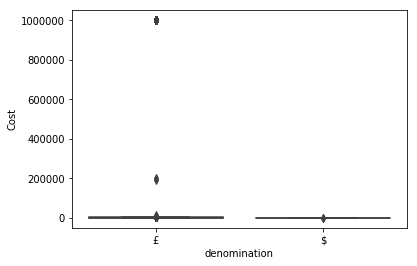

In [5]:
#Exploring outliers with boxplot and histogram
sns.boxplot(x='denomination', y='Cost', data=test_file)

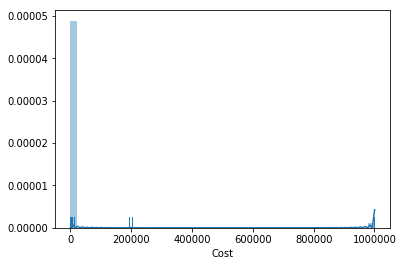

In [6]:
sns.distplot(test_file['Cost'], kde=True, rug=True)

In [7]:
# There are some huge values that are quite obviously mistakes.
# Explore all values above 10,000 to see if we can find some patterns.

test_file[test_file['Cost'] > 10000]


,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination
149,PMC3234811,ASBMB,Journal of Biological Chemistry,Picomolar nitric oxide signals from central ne...,999999.0,£
227,3708772,BioMed Central,BMC Genomics.,"Phenotypic, genomic, and transcriptional chara...",999999.0,£
277,PMC3668259,BMC,Trials,Community resource centres to improve the heal...,999999.0,£
358,PMC3219211,Cambridge University Press,Expert Reviews in Molecular Medicine,Pharmacological targets in the ubiquitin syste...,999999.0,£
404,PMC3533396,Company of Biologists,Journal of Cell Science,PKA isoforms coordinate mRNA fate during nutri...,999999.0,£
410,NaN,CUP,Journal of the International African Institute,"Pharmacy, money and public health in Dakar.",999999.0,£
491,PMCID: PMC3464430,Elsevier,Cell,piRNAs can trigger a multigenerational epigene...,999999.0,£
560,PMC3632754,Elsevier,Experimental Cell Research,Perturbation of invadolysin disrupts cell migr...,999999.0,£
630,Epub ahead of print April 2013 - print in press,Elsevier,Journal of paediatric Urology,Persistent unexplained congenital clitoromegal...,999999.0,£
660,PMID:23291342 PMC3581773,Elsevier,Molecluar & Cellular Endocrinology,Periconceptional changes in maternal exposure ...,999999.0,£


In [8]:
#Remove all the rows with data that has cost entry as 999999 and 0
test_file = test_file[test_file['Cost'] != 999999.0]


#That leaves 3 outliers
test_file[test_file['Cost'] > 10000]


,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination
986,NaN,MacMillan,NaN,Fungal Disease in Britain and the United State...,13200.0,£
1470,3547931,Public Library of Science,PLoS One,Reducing stock-outs of life saving Malaria Com...,192645.0,£
1987,PMC3664409\n\n,Wiley,Movement Disorders,Limb amputations in fixed dystonia: a form of ...,201024.0,£


In [9]:
#These might just be a simple decimal placement issue

#Let's group cost mean by journal to see if adjusting the decimal point 
#2 places on the above outliers aligns the cost closer to overall pricing trends

grouping_file = test_file[test_file['Cost'] < 10000]
grouping_file = grouping_file.groupby('Journal title').describe()

#Transforming file to CSV to explore view data better -- could I have done it as a SQL file??
grouping_file.to_csv('/Users/Albert/Desktop/grouping_file.csv')


In [10]:
#MacMillan has no other entries under that publisher name, so we'll remove that entry
test_file = test_file[test_file['Publisher'] != 'MacMillan']

#Decimal shifted costs for the other 2 entries are with 1 standard deviation
#of mean costs for PLOS and Wiley publications

#Let's adjust those 2 entries as indicated
test_file.loc[1470, 'Cost'] = 1926.45
test_file.loc[1987, 'Cost'] = 2010.24

### Converting from Euro to Dollar

In [11]:
#Transforming euros to dollars for analytical consistency

for x in range(len(test_file)):
    if test_file.iloc[x, 5] == '£':
        test_file.iloc[x, 4] *= 1.4

test_file.head(20)

,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,0.000,£
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,3333.456,£
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",899.584,£
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,937.496,£
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,960.232,£
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,3349.080,£
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,3315.130,£
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,909.062,£
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,1812.426,£
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,1812.692,£


### Removing Outliers

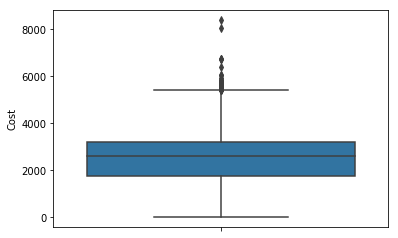

In [12]:
sns.boxplot(y='Cost', data=test_file)

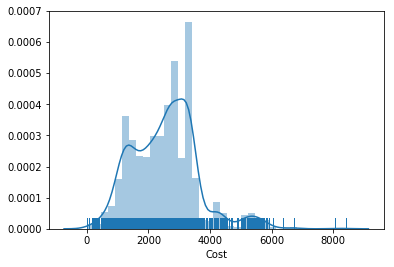

In [13]:
sns.distplot(test_file['Cost'], kde=True, rug=True)

In [14]:
#We still have a few outliers towards the top, however these are reasonable values particularly
#when you observe that the distribution is not normal but rather has 2 heads/clusters of price

# Searching and removing article name duplicates

In [15]:
# Identifying article name series to work with
article_names = test_file['Article title']

#Stripping whitespace and creating the same casing for all
article_names = article_names.str.lower()
article_names = article_names.str.strip()

#Removing all non-alpha characters for more accurate comparison
article_names = article_names.apply(lambda x: ''.join(list(filter(str.isalpha, x))))
article_names

0       reducedparahippocampalcorticalthicknessinsubje...
1       structuralcharacterizationofamodelgramnegative...
2       fumaroylaminoepoxymorphinansandrelatedopioidsw...
3       orvinolswithmixedkappamuopioidreceptoragonista...
4       regioselectiveopeningofmyoinositolorthoestersm...
5       comparativestructuralandfunctionalstudiesofthi...
6       mappingproteolyticprocessinginthesecretomeofga...
7       quantitativesilencingofegfpreportergenebyselfa...
8       anovelallostericinhibitoroftheuridinediphospha...
9       chemicalproteomicanalysisrevealsthedrugability...
10      locatingsweetspotsforscreeninghitsandevaluatin...
11      synthesisandevaluationofthymidineanaloguesasno...
12      discoveryandstructureactivityrelationshipsofpy...
13      monomerichasachaperonelikeactivityandisstabili...
14      synthesisandinvitroandinvivocharacterizationof...
15      muchofthegeneticriskofcolorectalcancerislikely...
16                           annexininteractionwithfpralx
17      sialoa

In [16]:
#Creating comparative list, creating value mask to indicate duplicates and then calling via dataframe
comparative_list = list(article_names)

value_mask = article_names.apply(lambda x: comparative_list.count(x) > 1)
test_file['duplicates'] = value_mask

test_file[test_file['duplicates'] == True]

,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination,duplicates
742,PMC3746156,Elsevier,Neuroscience,The relationship between tetanus intensity and...,3432.086,£,True
744,PMC3746156,Elsevier,Neuroscience,The relationship between tetanus intensity and...,3224.424,£,True
1344,PMC 3435256,Public Library of Science,Neglected Tropical Disease,A long neglected world malaria map: Plasmodium...,5040.000,£,True
1400,PMC 3435256,Public Library of Science,PLoS Neglected Tropical Diseases,A long neglected world malaria map: Plasmodium...,2024.582,£,True
1490,Pending,Public Library of Science,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",1155.952,£,True
1496,NaN,Public Library of Science,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",1155.952,£,True
1786,PMC3597274,Springer,Social Psychiatry & Psychiatric Epidemiology,Abuse and other correlates of common mental di...,2434.782,£,True
1789,PMC3597274,Springer,Social Psychiatry and Psychiatric Epidemiology,Abuse and other correlates of Common Mental Di...,2668.372,£,True


In [17]:
#Now let's drop the duplicates

test_file = test_file.drop([742, 1344, 1496, 1789])
test_file[test_file['duplicates'] == True]

,PMID/PMCID,Publisher,Journal title,Article title,Cost,denomination,duplicates
744,PMC3746156,Elsevier,Neuroscience,The relationship between tetanus intensity and...,3224.424,£,True
1400,PMC 3435256,Public Library of Science,PLoS Neglected Tropical Diseases,A long neglected world malaria map: Plasmodium...,2024.582,£,True
1490,Pending,Public Library of Science,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",1155.952,£,True
1786,PMC3597274,Springer,Social Psychiatry & Psychiatric Epidemiology,Abuse and other correlates of common mental di...,2434.782,£,True


# Grouping by Journal Title

In [18]:
#We already have a grouping by journal
grouping_file

Cost               \
                                                   count         mean   
Journal title                                                           
ACS Chemical Biology                                 5.0  1418.186000   
ACS Chemical Neuroscience                            1.0  1186.800000   
ACS NANO                                             1.0   642.890000   
ACS Nano                                             1.0   693.390000   
ACTA F                                               1.0   754.900000   
AGE                                                  1.0  2002.000000   
AIDS                                                 3.0  2059.306667   
AIDS Behav                                           1.0  1834.770000   
AIDS Care                                            2.0  2189.170000   
AIDS Journal                                         1.0  2015.720000   
AIDS Research and Therapy                            1.0  1240.000000   
AIDS UK                                              2.0  1836.920000   
ASN Neuro                                            1.0  1453.420000   
Academy of Nutrition and Dietetics                   1.0  2379.540000   
Acta Crystallographica Section D,  Biological C...   1.0   771.420000   
Acta Crystallographica Section D: Biological Cr...   1.0   773.740000   
Acta Crystallographica Section F: Structural Bi...   2.0   796.635000   
Acta Crystallographica, Section D                    1.0   757.180000   
Acta Crystallography D                               1.0   774.190000   
Acta D                                               1.0   750.160000   
Acta Dermato Venereologica                           1.0   653.960000   
Acta Diabetologica                                   1.0  2336.280000   
Acta Neuropathol                                     1.0  1901.040000   
Acta Neuropathologica                                3.0  2161.063333   
Acta Opthalmologica                                  1.0  2270.160000   
Acta Physiol                                         1.0  1991.500000   
Addiction                                            2.0  2136.225000   
Advances in Experimental Medicine and Biology        4.0  1928.457500   
Age                                                  1.0  2338.280000   
Age and Ageing                                       1.0  2040.000000   
...                                                  ...          ...   
Translational Psychiatry                             2.0  2880.000000   
Trends in Cognitive Science                          1.0  2340.630000   
Trends in Genetics                                   2.0  2370.935000   
Trends in Microbiology                               1.0  2291.330000   
Trends in Molecular Medicine                         1.0  2248.330000   
Trends in Neuroscience                               1.0  2402.810000   
Trends in Neurosciences                              1.0  2426.960000   
Trends in Parasitology                               3.0  2257.653333   
Trials                                               3.0  1212.300000   
Trials                                               1.0  1165.000000   
Trop Med Int Health                                  1.0  1834.770000   
Tropical Animal Health & Production                  1.0  2054.780000   
Tropical Medicine and International Health           6.0  1843.163333   
Tuberculosis                                         2.0  2161.255000   
Urban History                                        1.0  2034.000000   
Urolithiasis                                         1.0  1112.400000   
Vaccine                                              5.0  1623.394000   
Vascular Pharmacology                                1.0  2352.530000   
Veterinary Microbiology                              1.0  2451.490000   
Veterinary Parasitology                              1.0  2488.170000   
Veterinary Record                                    1.0  2040.000000   
Veterinary Research                  

In [19]:
# Now we will manually review data and create a dictionary for Publisher and Journal Title 
# where the keys represent the desired value, and the values represent
# the different current variations of that value in the data

In [20]:
# Data cleaning for Publishers column

publisher_changes = {
    'ACS': ['ACS (Amercian Chemical Society) Publications',
           'ACS Publications',
           'American Chemical Society',
           'AMERICAN CHEMICAL SOCIETY',
           'American Chemical Society Publications'],
    'American Society for Biochemistry and Molecular Biology':
        ['American Society for Biochemistry and Molecular Biolgy',
        'American Soc for Biochemistry and Molecular Biology',
        'The American Society for Biochemistry and Molecular Biology',
        'The American Society for Biochemistry and Molecular Biology, Inc'],
    'American Society of Hematology': ['American Society of Haematology',
                                       'American Society of Hamatology'],
    'ASBMB': ['ASBMB Cadmus',
             'ASBMB/Cadmus',
             'ASBMB/Cenveo Publisher Services',
             'ASBMC /CENVEO'],
    'ASM': ['ASM (American Society for Microbiology)'],
    'Bentham Science Publishers': ['Benthan Science Publishers'],
    'BioMed Central': ['BioMed Central Limited',
                      'BioMed Central Ltd'],
    'BioScientific': ['Bioscientifica'],
    'BMJ Group': ['BMJ',
                 'BMJ Publishing Group',
                 'BMJ PUBLISHING GROUP',
                 'BMJ Publishing Group Ltd',
                 'BMJ Publishing Group Ltd & British Thoracic Society'],
    'Cadmus Journal Services': ['Cadmus',
                               'CADMUS JOURNAL SERVICE',
                               'CADMUS JOURNAL SERVICES'],
    'Cambridge University Press': ['Cambridge Univ Press'],
    'Cenveo Publisher services': ['Cenveo Publisher Services/ASM JV1'],
    'Cold Spring Harbor Press': ['Cold Spring Habour Press',
                                'Cold Spring Harbor',
                                'Cold Spring Harbor Laboratory Press',
                                'Cold Spring Harbor Publications'],
    'Company of Biologists': ['Company of Biologist',
                             'Company of Biologists Ltd',
                             'THE COMPANY OF BIOLOGISTS',
                             'The company of Biolgists',
                             'The Company of Biologists',
                             'The Company of Biologists Ltd'],
    'Copyright Clearace Center': ['Copyright Clearance Center'],
    'Dartmouth Journal Services': ['Darmouth Journal Services',
                                  'Dartmouth Journals'],
    'Elsevier': ['Elseveier Science', 
                 'ELSEVIER', 
                 'Elsevier (Cell Press)',
                 'Elsevier / Cell Science', 
                 'Elsevier/Cell Press', 
                 'Elsevier Ltd',
                 'Elsevier B.V.'],
    'European Society of Endocrinolog': ['European Society of Endocrinology'],
    'Federation of American Societies for Experimental Biology': 
            ['Federation of American Societies for Experimental Biology (FASEB)'],
    'Frontiers': ['Frontiers Media', 'Frontiers Media SA'],
    'Future Medicine': ['Future Medicine Ltd'],
    'Hindawi Publishing Corporation': ['Hindawi'],
    'Impact Journals': ['Impact Journals LLC'],
    'Informa Healthcare': ['Informa Healthcare communications'],
    'International Union Against Tuberculosis and Lung Disease':
            ['International Union Against tuberculosis and Lung Disease'],
    'International Union of Crystallography': 
        ['International Union of Crystallography (iucr)'],
    'John Wiley & Sons': ['John Wiley', 
                          'JOHN WILEY & SONS',
                          'John Wiley & Sons Inc', 
                          'John Wiley & Sons Ltd',
                          'John Wiley & Sons, Inc. '],
    'Karger': ['KARGER'],
    'Landes Bioscience': ['Landes Biosciences'],
    'Mary Ann Liebert': ['MARY ANN LIEBERT INC', 
                         'Mary Ann Liebert, Inc. Publishers'],
    'Mit Press': ['MIT PRESS OPEN ACCESS'],
    'MY JOVE CORP': ['My JOVE corporation', 'MYJoVE Corporation'],
    'National Academy of Sciences': 
            ['National Academy of Sciences of the United States of America',
            'National Academy of Sciences USA'],
    'Nature Publishing Group': ['Nature',
                               'Nature PG',
                               'Nature Publishing',
                               'Nature publishing group',
                               'NATURE PUBLISHING GROUP LTD',
                               'NPG'],
    'Oxford Journals': ['Oxford Journals (OUP)'],
    'Oxford University Press': ['Oxford Univ Press',
                               'OXFORD UNIVERSITY PRESS',
                               'Oxford University Press (OUP)',
                               'Oxford Univesity Press'],
    'PLoS (Public Library of Science)': ['PLoS', 'Plos', 'PLOS', 'Public Library of Science'],
    'PNAS': ['PNAS Author Publication'],
    'Portland Press': ['Portland press', 
                       'PORTLAND PRESS LTD', 
                       'Portland Press Ltd'],
    'PubMed': ['PubMed Central'],
    'Royal Society': ['Royal Society for Chemistry', 
                      'Royal Society of Chemistry',
                      'RSC', 
                      'RSC Publishing', 
                      'The Royal Society', 
                      'The royal Society'],
    'Sage Publications': ['Sage', 
                          'SAGE', 
                          'SAGE Publications', 
                          'Sage Publications Inc',
                          'Sage Publications Ltd', 
                          'Sage Publishers',
                          'Sage Publishing'],
    'Society for General Microbiology': ['Society for Genermal Microbiology'],
    'Society for Neuroscience': ['Society for Neurosciences',
                                'SOCIETY OF NEURO SCIENCES',
                                'Society of Neuroscience'],
    'Springer': ['Springer - Verlag GMBH', 
                 'Springer Science + Business Media',
                 'Springer-Veriag GmbH', 
                 'SPRINGER-VERLAG GMBH',
                 'Springer-Verlag GmbH', 
                 'Springer-Verlag GmbH',
                 'Springer-Verlag GMBH & Ci',
                 'Springer-Verlag GmbH', 
                 'Heidelberger Platz 3, D-14197 Berlin'],
    'Taylor & Francis': ['T&F',
                        'Taylor & Francis Journals '],
    'The Endocrine Society': ['The Endocrine Socety',
                             'THE ENDOCRINE SOCIETY',
                             'The Endrocrine Society'],
    'Wiley': ['Wiley & Son',
             'Wiley Blackwell',
             'Wiley Online Library',
             'Wiley Subscription Services',
             'Wiley Subscription Services  Inc.',
             'Wiley Subscription Services  Inc'
             'Wiley Subscription Serviices Inc',
             'Wiley VCH',
             'Wiley-Blackwell',
             'Wiley-Blackwell, John Wiley & Sons',
             'Wiley-VCH',
             'Wliey-Blackwell'],
    'Wolters Kluwer': ['Wolters Kluwer Health',
                      'Wolters Kluwer N.V./Lippinott',
                      'Wolters Kluwers'] 
}

for publisher in test_file.Publisher:
    for k, v in publisher_changes.items():
        if publisher in v:
            test_file.Publisher[test_file.Publisher == publisher] = k

/Users/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [21]:
# Data cleaning for Journal column

journal_changes = {
    'Journal of Medicinal Chemistry': ['J Med Chem',
                                      'J Med Chem.'],
    'ACS Nano': ['ACS NANO'],
    'Journal of Neurophysiology': ['The Journal of Neurophysiology'],
    'American Journal of Psychiatry': ['Americal Journal of Psychiatry'],
    'Journal of Biological Chemistry': ['J Biol Chem.',
                                       'JOURNAL OF BIOLOGICAL CHEMISTRY',
                                       'The Journal of Biological Chemistry',
                                       'J Biol Chemistry',
                                       'Journal of biological chemistry',
                                       'The journal of Biological Chemistry',
                                       'Jnl Biological Chemistry',
                                       'Journal Biological Chemistry',
                                       'Journal of Biol Chem',
                                       'Biochem Journal',
                                       'Jnl Biological Chemistry'],
    'Antimicrobial Agents and Chemotherapy': ['Antimicrobial Agfents and Chemotherapy',
                                             'Antimicobial Agents and Chemotherapy'], # typo
    'Blood': ['Blood Journal 2012'],
    'Journal of Clinical Microbiology': ['Jounral of Clinical Microbiology',
                                        'J Clin Microbiol'], # typo
    'Molecular and Cellular Proteomics': ['MCP (Molecular & Cellular Proteomics)'],
    'BMC Genomics': ['BMC Genome Biology'],
    'International Journal of Behavioral Nutrition and Physical Activity':
            ['International Journal of Behavioural Nutrition and Physical Activity'],
    'European Journal of Endocrinology': ['Journal of Endocrinology'],
    'BMJ': ['BMJ Open',
           'BMJ OPEN',
           'BMJ open'],
    'British Journal of Ophthalmology': ['British Journal of Opthalmology'],
    'Journal of Neurology, Neurosurgery & Psychiatry ': 
            ['Journal of Neurology, Neurosurgery and Psychiatry'],
    'Sexually Transmitted Infections': ['Sex Transm Infect.'],
    'British Journal for the History of Science':
        ['British Journal of the History of Science'],
    'Psychological Medicine': ['Pyschological Medicine'],
    'Journal of Cell Science': ['J Cell Sci.'],
    'American Journal for Clinical Nutrition': 
            ['American Journal of Clinical Nutrition'],
    'Cell Reports': ['Cell Press - Cell Reports'],
    'Genetics': ['GENETICS'],
    'Journal of Immunology': ['J Immunol'
                             'The Journal of Immunology'],
    'Behavior Research and Therapy': ['Behaviour Research and Therapy'],
    'Chemistry & Biology': ['Chemsitry & Biology'],
    'Consciousness and Cognition': ['Consciousness & Cognition'],
    'Current Biology': ['CURRENT BIOLOGY'],
    'Current Opinions in Neurobiology': ['Current Opinions in Neurobiology'],
    'Developmental Cell': ['DEVELOPMENT CELL'],
    'FEBS Letters': ['Febs Letters'],
    'Gene Therapy': ['Gene',
                    'GENE'],
    'Health & Place': ['Health and Place'],
    'Immunobiology': ['Immnunobiology'],
    'Journal of Allergy and Clinical Immunology': 
            ['JOURNAL OF ALLERGY & CLINICAL IMMUNOLOGY',
            'Journal of allergy and clinical immunology'],
    'Journal of Behavior Therapy and Experimental Psychiatry':
            ['Journal of Behaviour therapy and Experimental Psychiatry'],
    'Lancet Global Health': ['Lancet'],
    'Molecular and Cellular Endocrinology': ['Molecluar & Cellular Endocrinology'],
    'NeuroImage': ['Neuroimage: Clinical'],
    'Social Science and Medicine': ['Social Science & Medicine'],
    'Studies in History and Philosophy of Science Part C':
            ['Studies in History and Philosophy of Science Part C: Studies in History and Philosophy of Biological and Biomedical Sciences'],
    'The American Journal of Human Genetics': ['The Americal Journal of Human Genetics'],
    'The Lancet Neurology': ['The Lancet'],
    'Trends in Neuroscience': ['Trends in Neurosciences'],
    'FASEB Journal': ['The FASEB Journal'],
    'International Journal of Tuberculosis  and Lung Disease': ['IJTLD'],
    'Acta Crystallographica, Section D': 
            ['Acta Crystallographica Section D: Biological Crystallography',
            'Acta Crystallography D',
            'Acta D'],
    'Acta Crystallographica Section F: Structural Biology and Crystallization Communications':
            ['ACTA F'],
    'Epigenetics': ['Epigentics'],
    'Antioxidants & Redox Signaling': ['Antioxidants and Redox Signaling'],
    'The Journal of Cognitive Neuroscience': ['Journal of Cognitive Neuroscience'],
    'Journal of Visualized Experiments': ['Journal of Visulaized expermiments'],
    'Proceedings of the National Academy of Sciences':
            ['Proceddings of the National Academy of Sciences of USA',
            'Proceedings of the National Academy of Sciences of the United States of America'],
    'EMBO Journal': ['EMBO',
                    'The EMBO journal',
                    'The EMBO Journal'],
    'Nature Communications': ['Nature communications',
                             'NATURE COMMUNICATIONS'],
    'Scientific Reports': ['Sci Rep',
                          'Scientific Reports-11-00861B'],
    'American Journal of Epidemiology': ['American Jnl Epidemiology'],
    'International Journal of Epidemiology': ['Int J Epidemiol',
                                             'International Joural of Epidemiology'],
    'Clinical Infectious Diseases': ['Clinicla Infectious Disease'],
    'International Journal of Epidemiology': ['Inyernational Journal of Epidemiology'],
    'Bioinformatics': ['Biinformatics',
                      'Bioinformatics Online'],
    'Nucleic Acids Research': ['NUCLEIC ACIDS RESEARCH'],
    'The Journal of Infectious Diseases': ['J Infect Dis',
                                          'Journal of Infectious Diseases'],
    'PloS One': ['PLoS ONE',
                'PLOS ONE',
                'PLoS One',
                'PLoS 1',
                'Plos ONE',
                'PLOS One',
                'PLoSONE',
                'PLosONE'],
    'Proceedings of the National Academy of Sciences': 
                            ['PNAS',
                            'Proceedings of the National Academy of Sciences (PNAS)',
                            'PNAS USA',
                            'Proceedings of the National Academy of Sciences of the USA',
                            'Proc Natl Acad Sci U S A.',
                            'Proceedings of the national Academy of Sciences'],
    'Biochemical Journal': ['Biochemical Journals',
                           'The Biochemical Journal'],
    'PLoS Computational Biology': ['PLOS COMPUTATIONAL BIOLOGY'],
    'PLoS Genetics': ['PLOS Genetics',
                     'PLoS GENETICS'],
    'PLoS Neglected Tropical Diseases': ['PLoS Negected Tropical Diseases'],
    'PLoS Pathogens': ['PLOS Pathogens',
                      'Plos Pathogens'],
    'Public Library of Science': ['Public Library of Science ONE'],
    'British Journal of Psychiatry': ['Britsh Journal of Psychiatry',
                                     'The British Journal of Psychiatry'],
    'Journal of the Royal Society Interface': ['Journal of the Royal Society, Interface'],
    'Proceedings of the Royal Society': ['Proceedings of Royal Society',
                                        'Proceedings of the Royal Society B: Biological Sciences'],
    'Journal of Neuroscience': ['The Journal of Neuroscience'],
    'European Child and Adolescent Psychiatry': 
            ['European Child and Adolescent Psychiatty'],
    'Social Psychiatry and Psychiatric Epidemiology': 
            ['Social Psychiatry and Psychiatric Epidemiol'],
    'Aids Care': ['AIDS Care'],
    'Journal of Clinical Endocrinology and Metabolism':
            ['Endocrinology',
            'Journal of Clinical Endocrinology'],
    'British Journal of Psychiatry': ['BJP'],
    'FEBS Journal': ['FEBS J.',
                    'The FEBS Journal'],
    'British Journal of Pharmacology': ['British Jounal of Pharmacology'],
    'Genetic Epidemiology': ['Genetic Epidemology'],
    'AIDS Journal': ['AIDS'],
    'Journal of Acquired Immune Deficiency Syndromes':
            ['Journal of Acquired Immune Deficiency Syndroms (JAIDS)',
            'JAIDS Journal of Acquired Immune Deficiency Syndromes'],
    'NeuroImage': ['Neuroimage']

}

for journal in test_file['Journal title']:
    for k, v in journal_changes.items():
        if journal in v:
            test_file['Journal title'][test_file['Journal title'] == journal] = k


/Users/Albert/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [22]:
#Journal mean and standard deviation

grouping_file = test_file.groupby('Journal title').describe()
grouping_file

Cost               \
                                                   count         mean   
Journal title                                                           
ACS Chemical Biology                                 5.0  1985.460400   
ACS Chemical Neuroscience                            1.0  1661.520000   
ACS Nano                                             2.0   935.396000   
AGE                                                  1.0  2802.800000   
AIDS Behav                                           1.0  2568.678000   
AIDS Journal                                         4.0  2867.774000   
AIDS Research and Therapy                            1.0  1736.000000   
AIDS UK                                              2.0  2571.688000   
ASN Neuro                                            1.0  2034.788000   
Academy of Nutrition and Dietetics                   1.0  3331.356000   
Acta Crystallographica Section D,  Biological C...   1.0  1079.988000   
Acta Crystallographica Section F: Structural Bi...   3.0  1095.812667   
Acta Crystallographica, Section D                    4.0  1069.344500   
Acta Dermato Venereologica                           1.0   915.544000   
Acta Diabetologica                                   1.0  3270.792000   
Acta Neuropathol                                     1.0  2661.456000   
Acta Neuropathologica                                3.0  3025.488667   
Acta Opthalmologica                                  1.0  3178.224000   
Acta Physiol                                         1.0  2788.100000   
Addiction                                            2.0  2990.715000   
Advances in Experimental Medicine and Biology        4.0  2699.840500   
Age                                                  1.0  3273.592000   
Age and Ageing                                       1.0  2856.000000   
Ageing & Society                                     1.0  2373.000000   
Aging Cell                                           1.0  2758.798000   
Aids Care                                            4.0  3211.915000   
Alcohol and Alcoholism                               1.0  2856.000000   
Alimentrary Pharmacology & Therapeutics              2.0  3323.026000   
Am J Bioeth                                          1.0  2525.866000   
Am J Trop Med Hyg                                    1.0  1613.500000   
...                                                  ...          ...   
Transactions of the Royal Society of Tropical M...   1.0  2133.712000   
Translational Psychiatry                             2.0  4032.000000   
Trends in Cognitive Science                          1.0  3276.882000   
Trends in Genetics                                   2.0  3319.309000   
Trends in Microbiology                               1.0  3207.862000   
Trends in Molecular Medicine                         1.0  3147.662000   
Trends in Neuroscience                               2.0  3380.839000   
Trends in Parasitology                               3.0  3160.714667   
Trials                                               3.0  1697.220000   
Trials                                               1.0  1631.000000   
Trop Med Int Health                                  1.0  2568.678000   
Tropical Animal Health & Production                  1.0  2876.692000   
Tropical Medicine and International Health           6.0  2580.428667   
Tuberculosis                                         2.0  3025.757000   
Urban History                                        1.0  2847.600000   
Urolithiasis                                         1.0  1557.360000   
Vaccine                                              5.0  2272.751600   
Vascular Pharmacology                                1.0  3293.542000   
Veterinary Microbiology                              1.0  3432.086000   
Veterinary Parasitology                              1.0  3483.438000   
Veterinary Record                                    1.0  2856.000000   
Veterinary Research                  

In [23]:
#Top Journals sorted by article count

grouping_file.sort_values(('Cost','count'), ascending=False)

Cost               \
                                                    count         mean   
Journal title                                                            
PloS One                                            188.0  1306.068936   
Journal of Biological Chemistry                      70.0  1948.396600   
Proceedings of the National Academy of Sciences      29.0   999.909448   
NeuroImage                                           29.0  3101.235586   
Nucleic Acids Research                               23.0  1636.904348   
PLoS Pathogens                                       22.0  2035.683727   
PLoS Genetics                                        21.0  2292.464000   
PLoS Neglected Tropical Diseases                     19.0  2181.897789   
BMJ                                                  19.0  3067.458947   
Nature Communications                                18.0  4387.786667   
Human Molecular Genetics                             17.0  2857.544118   
Biochemical Journal                                  15.0  2655.333333   
Journal of Clinical Endocrinology and Metabolism     15.0  3018.430800   
Journal of Neuroscience                              14.0  2525.923000   
Brain                                                14.0  3032.000000   
BMC Public Health                                    14.0  1748.522000   
Movement Disorders                                   13.0  2761.021846   
Developmental Cell                                   13.0  4645.620000   
Journal of Medicinal Chemistry                       12.0  1558.813667   
Journal of General Virology                          11.0  2784.090909   
FASEB Journal                                        11.0  2356.617455   
Current Biology                                      11.0  4916.355818   
EMBO Journal                                         10.0  4149.600000   
Proceedings of the Royal Society                     10.0  2053.240000   
Cell Reports                                         10.0  5135.541600   
Neuron                                                9.0  4991.902222   
Blood                                                 9.0  1964.178222   
Hepatology                                            8.0  2660.610750   
Molecular Microbiology                                8.0  2945.362000   
Neurobiology of Aging                                 8.0  3351.538750   
...                                                   ...          ...   
Immunobiology                                         1.0  3245.116000   
Immunological Reviews                                 1.0  2100.000000   
Immunology Letters                                    1.0  4146.688000   
Implement Sci.                                        1.0  1883.000000   
Infection Genetics and Evolution                      1.0  2478.868000   
Inflammation Research                                 1.0  3862.936000   
Inflammatory Bowel Diseases                           1.0  2698.584000   
Influenza Other Respi Viruses.                        1.0  2568.678000   
Hernia                                                1.0  2656.094000   
Heart and Circulatory Physiology                      1.0  1888.852000   
Frontiers in Systems Neuroscience                     1.0  2301.950000   
Heart                                                 1.0  2856.000000   
Frontiers in T Cell Biology                           1.0  1424.612000   
Fungal Biology                                        1.0  3180.814000   
Fungal Ecology                                        1.0  3329.466000   
Future Microbiology                                   1.0  2380.000000   
Future Neurology                                      1.0  2856.000000   
G3: Genes, Genomes, Genetics                          1.0  1722.938000   
Genetics                                              1.0  1107.302000   
Genetics                                              1.0  1676.808000   
Genetics in Medicine                                  1.0